In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
%cd drive/My\ Drive/Data\ Science

/content/drive/My Drive/Data Science


In [0]:
PATH = 'Boston'

In [9]:
%ls {PATH}

housingdata.csv


In [0]:
column_headers = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
                  'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

dataset = pd.read_csv(f'{PATH}/housingdata.csv', names=column_headers)

In [13]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Exploratory Data Analysis (EDA)

EDA is the process of understanding what the data is telling us by calculating statistics and creating charts and figures. These statistics and charts can help find anomalies which could impact our analysis or find relationships and trends between the various features in our data. EDA starts off at a high level but narrows in scope as we find interesting patterns and relationships in our data.

**Examine the distribution and summary statistics of the MEDV (Target) column**

This notebook is focused on creating a model that uses the 13 features in our dataset to predict the MEDV column, which is the median home value of each home in the dataset (in thousands).

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

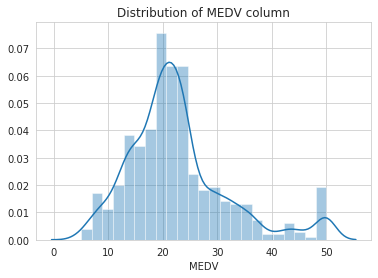

In [15]:
sb.set_style('whitegrid')
MEDV = sb.distplot(dataset['MEDV'])
MEDV.set(title = "Distribution of MEDV column")
dataset['MEDV'].describe()

In [17]:
# When mean is more than the median it is rightly skewed
dataset.MEDV.median()

21.2

**Check for missing valuest**

In [19]:
missing_values = dataset.isnull().sum().sum()
print("Missing values in dataset: ", missing_values)

Missing values in dataset:  0


In [20]:
dataset.isnull().sum()/len(dataset)

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

**Column Types**

It's important to understand the column types because a machine learning model can not use categorical variables. Categorical variables need to be encoded as numbers before being used by the model.

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


All of the column types are either int64 or float64 which indicates they are all numeric columns. We know the CHAS feature is binary so it can only take values of 0 and 1.

If there where a string variable present then the **type** would be **Object64**

Anomalies and Outliers

One way we can check for anomalies and outliers in the data is to look at the distributions of the features in our dataset as well as summary statistics for each column. To do this I'll plot some histograms and use the .describe() method.

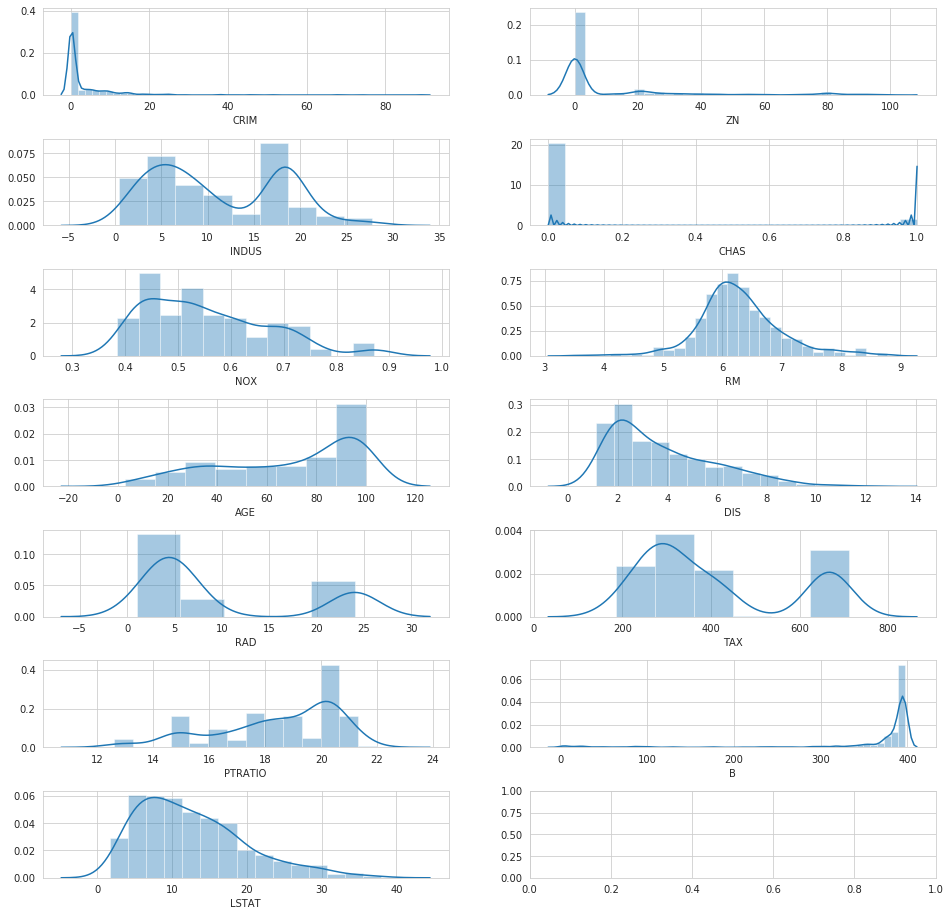

In [23]:
f, ax = plt.subplots(nrows = 7, ncols = 2, figsize=(16,16))
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
row = 0
col = 0
for i, column in enumerate(columns):
    g = sb.distplot(dataset[column], ax=ax[row][col])
    col += 1
    if col == 2:
        col = 0
        row += 1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

In [25]:
dataset.iloc[:,:-1].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Looking at these histograms and summary statistics, I noticed a couple interesting things:

- TAX column has a majority of its values in the 200-400 range but there are a collection of homes that have a TAX value of above 600
RAD column has most of its values between 0-10 but there is a collection of values over 20.
- Many of the columns are heavily skewed left or right. For example, the ZN column is heavily skewed right. I would like to understand that column in more detail and it's effect on the MEDV column. The code below will explore each observation.

In [0]:
rad_out = dataset.copy()
rad_out['OUTLIER'] = rad_out['RAD'].apply(lambda x: 1 if x > 15 else 0)

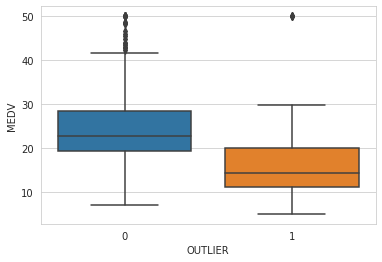

In [27]:
sb.boxplot(x='OUTLIER', y='MEDV', data=rad_out)

In [28]:
rad_out.groupby('OUTLIER').mean()['MEDV']

OUTLIER
0    24.695989
1    16.403788
Name: MEDV, dtype: float64

This is interesting! We see that mean MEDV value for houses that have a RAD value > 15 is 16 where as the mean MEDV value for houses that have a RAD value of < 15 is roughly 24. This is pictorally depicted by the boxplot above as well. We will keep this in mind when we engineer features later in the notebook.


Now we'll look at the TAX values

OUTLIER
0    24.857182
1    16.272263
Name: MEDV, dtype: float64

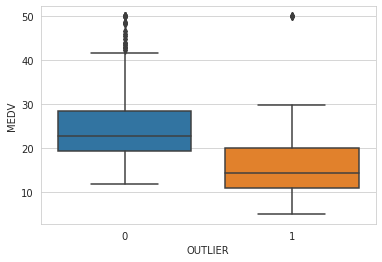

In [30]:
tax_out = dataset.copy()
tax_out['OUTLIER'] = dataset['TAX'].apply(lambda x: 1 if x > 600 else 0)
sb.boxplot(x='OUTLIER', y='MEDV', data=tax_out)
tax_out.groupby('OUTLIER').mean()['MEDV']

Somewhat similar to the RAD situation, the TAX column also seems to have an impact on the MEDV column. We will also keep this in mind down the road.

**ZN Column** The ZN column represents the proportion of residential land zoned for lots over 25,000 sq.ft.

In [31]:
dataset.groupby('ZN').count()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
ZN,,,,,,,,,,,,,
0.0,372,372,372,372,372,372,372,372,372,372,372,372,372
12.5,10,10,10,10,10,10,10,10,10,10,10,10,10
17.5,1,1,1,1,1,1,1,1,1,1,1,1,1
18.0,1,1,1,1,1,1,1,1,1,1,1,1,1
20.0,21,21,21,21,21,21,21,21,21,21,21,21,21
21.0,4,4,4,4,4,4,4,4,4,4,4,4,4
22.0,10,10,10,10,10,10,10,10,10,10,10,10,10
25.0,10,10,10,10,10,10,10,10,10,10,10,10,10
28.0,3,3,3,3,3,3,3,3,3,3,3,3,3


372 observations are 0 for the ZN column meaning that those lots are not in excess of 25000 square feet. The remaining observations are spread from numbers 12.5-100, indicating the percentage of land zoned for that lot. Let's try to vizualize the effect of these numebrs on the MEDV statistic.

- In order to vizualize this, I'm going to cut the ZN category into 4 bins (0-24, 25-50, 51-75, 76,-100) and chart the average MEDV value for each grouping.

In [32]:
zn = dataset.copy()
zn['BINNED'] = pd.cut(zn['ZN'], bins = 4)
zn.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,BINNED
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,"(-0.1, 25.0]"
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,"(-0.1, 25.0]"
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,"(-0.1, 25.0]"
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,"(-0.1, 25.0]"
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,"(-0.1, 25.0]"


In [33]:
zn_grouped = zn.groupby('BINNED').mean()['MEDV']
zn_grouped

BINNED
(-0.1, 25.0]     21.411189
(25.0, 50.0]     27.818750
(50.0, 75.0]     25.700000
(75.0, 100.0]    31.544828
Name: MEDV, dtype: float64

<BarContainer object of 4 artists>

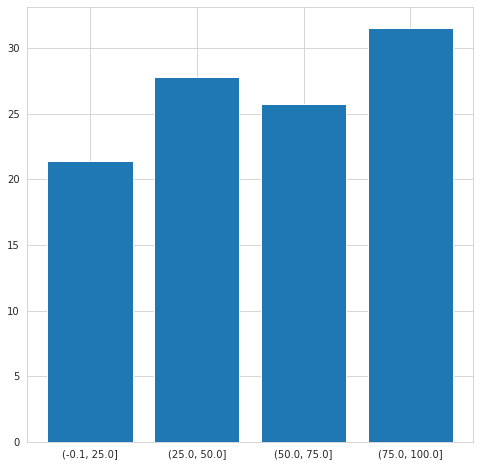

In [34]:
plt.figure(figsize=(8,8))
plt.bar(zn_grouped.index.astype(str), zn_grouped)

There is a clear positive trend between land zoned and MEDV home value. Intuitively this chart makes sense because the smaller the land size, the less value the home should be. I.E. homes with more land tend to be worth more.

Correlations

One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr method.

In [35]:
correlations = dataset.corr()['MEDV'].sort_values()
correlations

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

Let's take a look at some of the more significant correlations.

- The most negative correlation is LSTAT which is % lower status of the population, so what this is saying is as the % of lower status of the population increases for a home, the MEDV value of the home tends to decrease.

- The most positive correlation (Except for MEDV) is RM which is average number of rooms per home. This is saying that as the average number of rooms increase, the MEDV value of the home tends to increase.

Effect of RM on MEDV

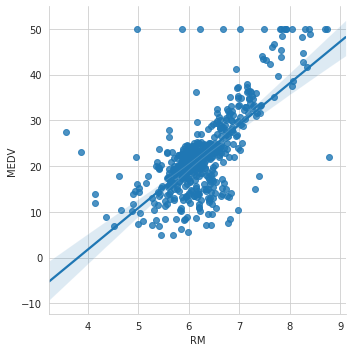

In [36]:
sb.lmplot(x='RM', y='MEDV', data=dataset)

The chart above helps confirm what was displayed by the correlation matrix. As the RM variable increases, the MEDV value also tends to increase.

Effect of LSTAT on MEDV

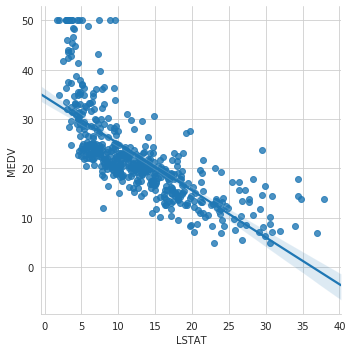

In [37]:
sb.lmplot(x='LSTAT', y='MEDV', data=dataset)

The chart above helps confirm what was displayed by the correlation matrix. As the RM variable increases, the MEDV value also tends to increase.

#Collinearity

Collinearity is the term used to describe the event when features are highly correlated with each other. Correlated features can pose problems in a regression model by masing the true effect of significant features. This can impact the quality of fit of a regression model and should be taken into account when creating one.

Pairplot

The pairplot is a great way to see relationships between pairs of variables. We can identify collinear variables as well as other interesting relationships between the predictors and the response.

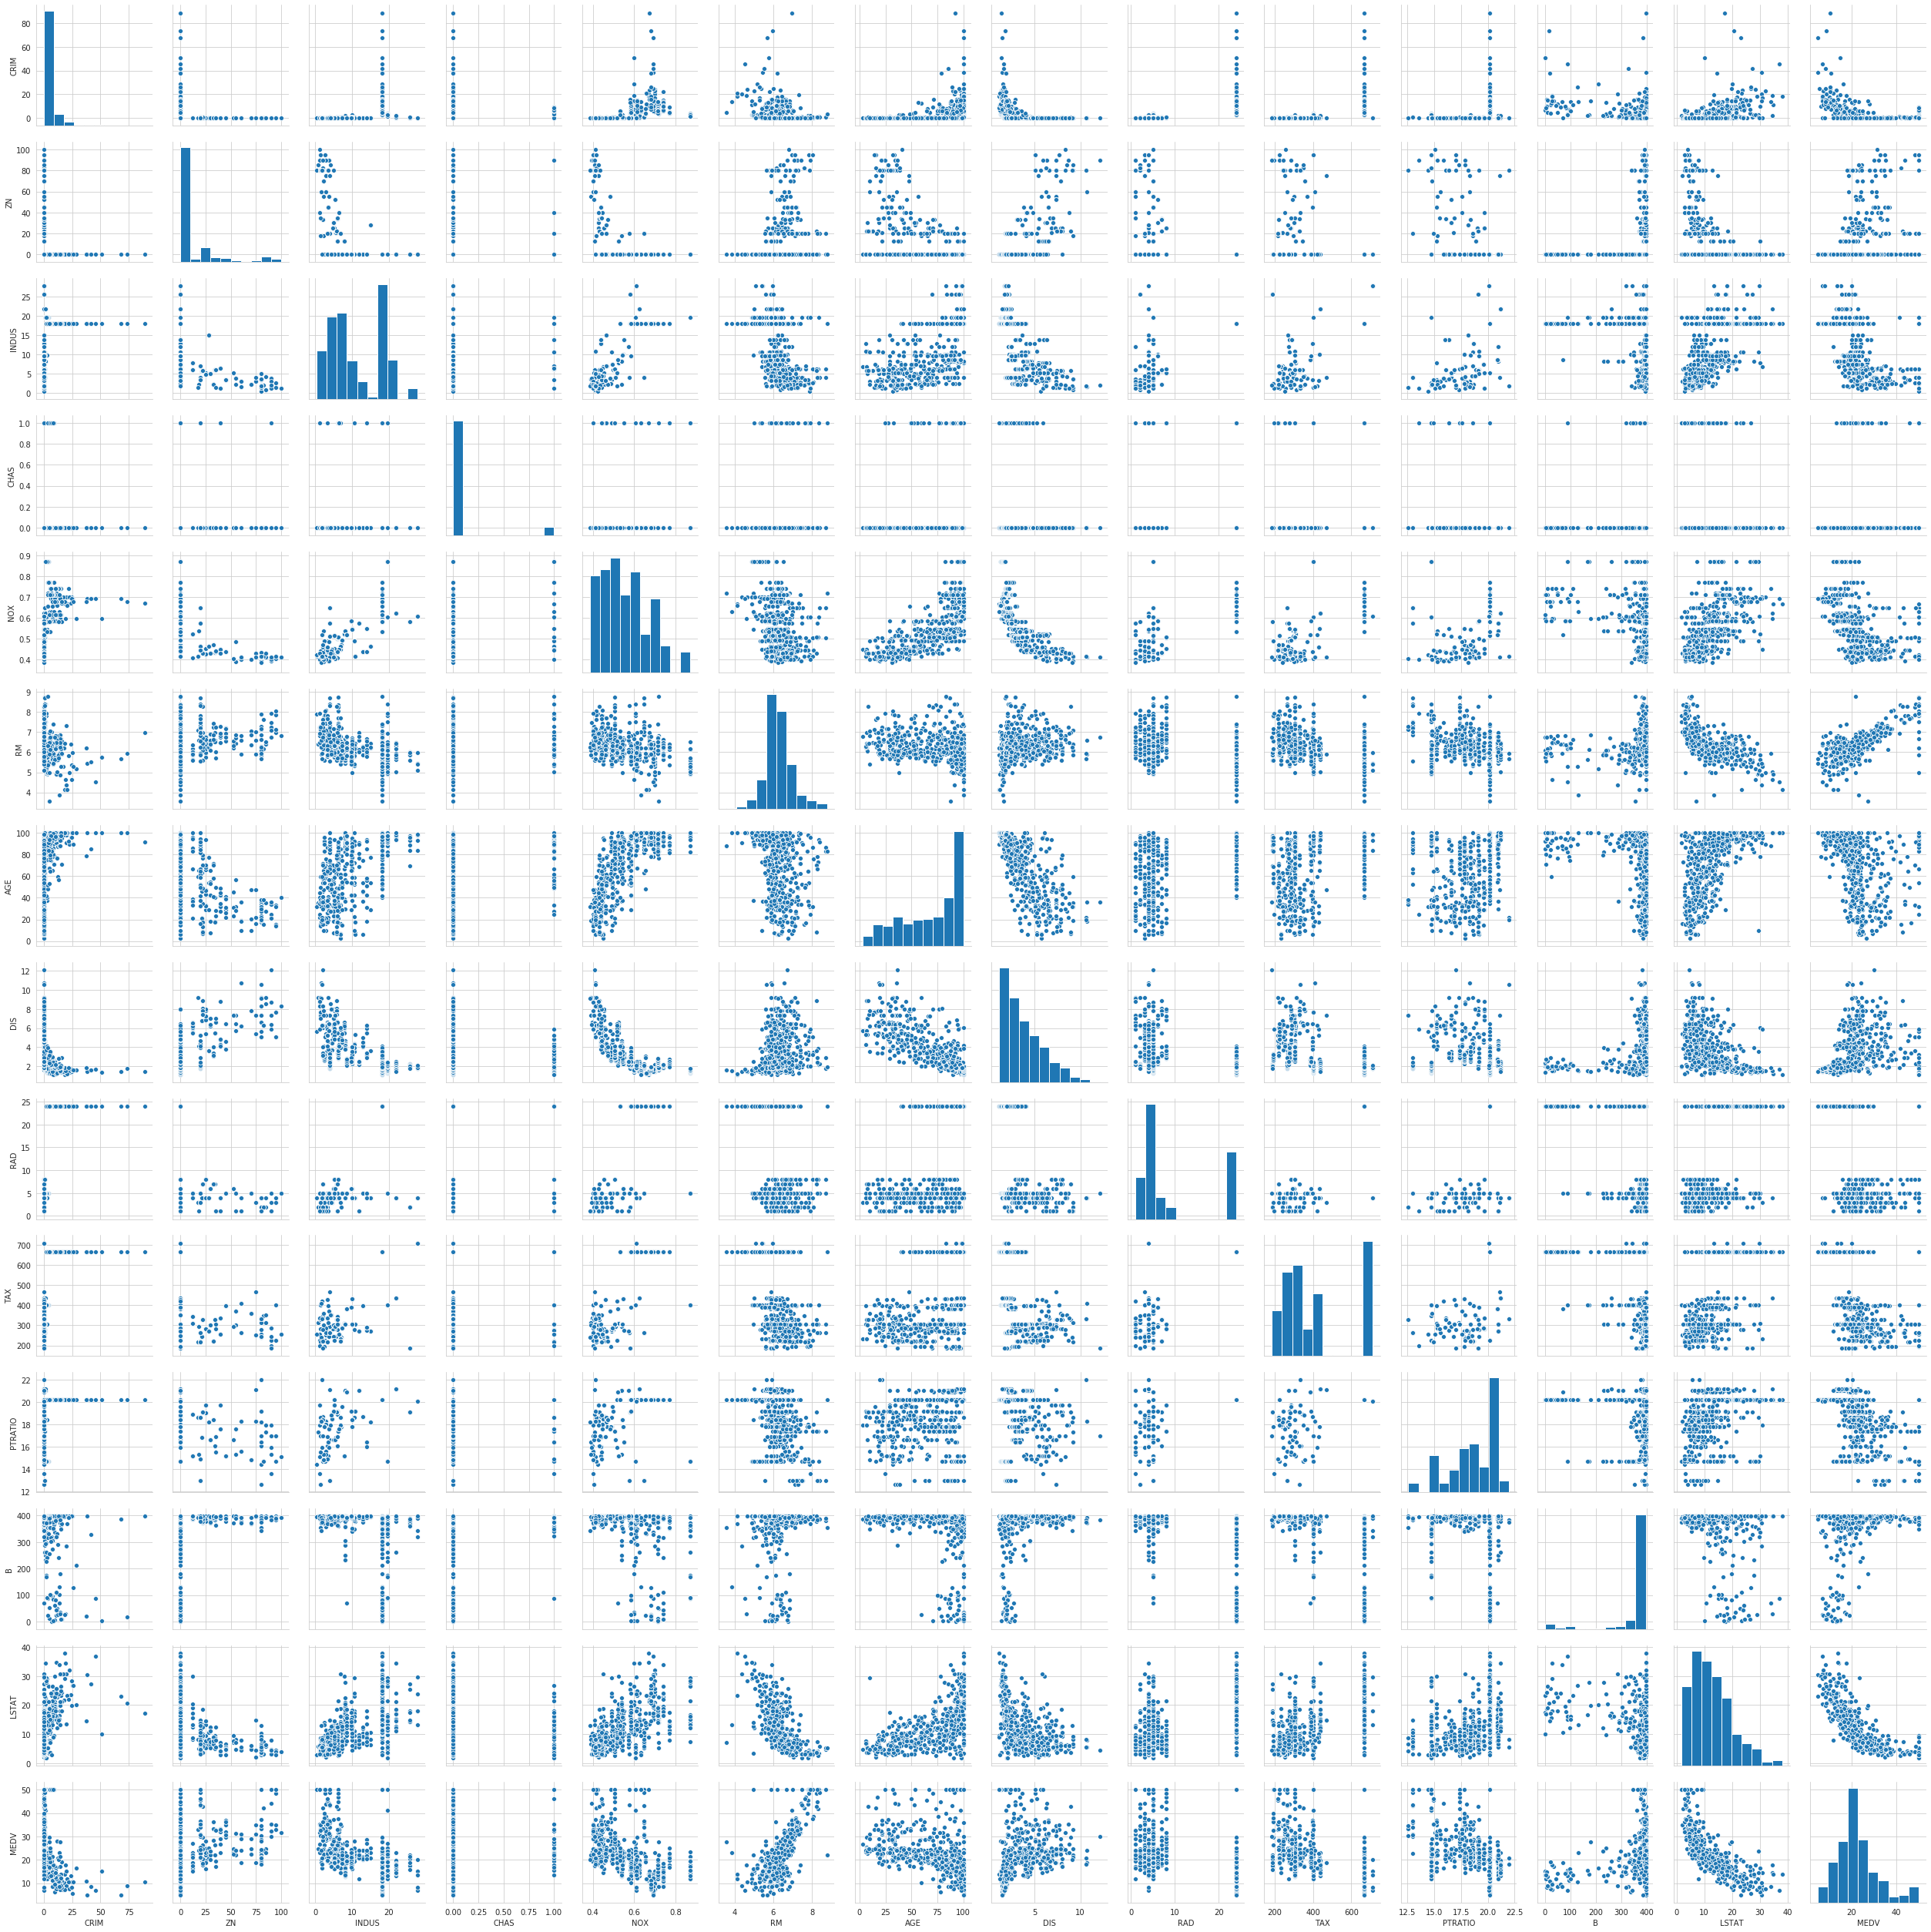

In [39]:
sb.pairplot(data=dataset)

Correlation Matrix

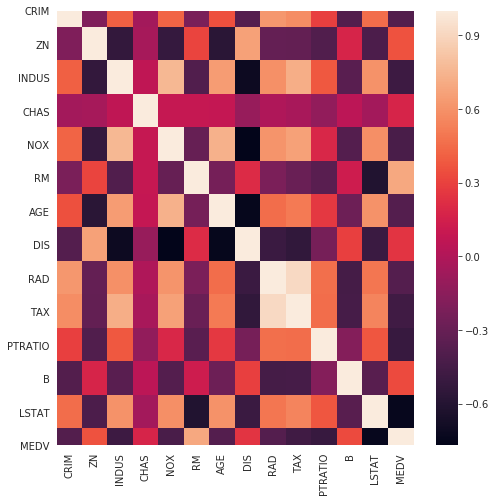

In [40]:
plt.figure(figsize=(8,8))
sb.heatmap(dataset.corr())

We can see that there appear to be a strong relationship between the following features:

- TAX and RAD
- DIS and AGE
- DIS and NOX
- DIS and INDUS
- TAX and INDUS
- NOX and INDUS

**Multicollinearity**

Not all correlation problems can be detected by looking at the pairplot or correlatio matrix. It is possible for correlation to exist between 3 or more variables, which is called multicollinearity. One way we can spot collinearity and multicollineary in the data is by calculating the [Variance Inflation Factor](https://en.wikipedia.org/wiki/Variance_inflation_factor) for each variable. a VIF 10 means that the variable could be problematic and impact the results of a regression model.

In [0]:
#Imports to calculate VIF's for each predictor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from patsy import dmatrices

In [0]:
features = "+".join(dataset.columns[:-1])

# get y and X dataframes based on this regression:
y, X = dmatrices('MEDV ~' + features, dataset, return_type='dataframe')

In [43]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by='VIF Factor', ascending=False).iloc[1:,:]

,VIF Factor,features
10,9.008554,TAX
9,7.484496,RAD
5,4.393720,NOX
3,3.991596,INDUS
8,3.955945,DIS
7,3.100826,AGE
13,2.941491,LSTAT
2,2.298758,ZN
6,1.933744,RM
11,1.799084,PTRATIO


We can see the VIF Factors for the TAX and RAD features are the highest among the features. Additionally, those two features are highly correlated with eachother as noted above. Let's try adding these two features together and see if the VIF factor of the new feature is lower than the previous two.

In [0]:
tax_rad = dataset.copy()
tax_rad['taxrad'] = tax_rad['TAX'] + tax_rad['RAD']
tax_rad = tax_rad.drop(['TAX', 'RAD'], axis=1)

In [0]:
#gather features
features = "+".join(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'taxrad',
       'PTRATIO', 'B', 'LSTAT'])

# get y and X dataframes based on this regression:
y, X = dmatrices('MEDV ~' + features, tax_rad, return_type='dataframe')

In [46]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by='VIF Factor', ascending=False).iloc[1:,:]

,VIF Factor,features
5,4.317212,NOX
8,3.954904,DIS
3,3.655720,INDUS
9,3.428369,taxrad
7,3.083779,AGE
12,2.937900,LSTAT
2,2.269228,ZN
6,1.887130,RM
10,1.742943,PTRATIO
1,1.674700,CRIM


Here we can see the VIF factor of the new "taxrad" feature has a significantly lower VIF factor than both the TAX and RAD features. We will keep this in mind moving forward.

# Feature Engineering


Feature engineering is the process of constructing new features from features already in the dataset. There are many ways to perform feature engineering and one way is through constructing interaction terms between the features. These include current features raised to a power, current features multiplied by each other, etc. They are called interaction terms because they capture interactions within variables.

In [48]:
##Dataframe to capture polynomial features
poly_features = dataset.copy()

#Capture target variable
poly_target = poly_features['MEDV']
poly_features = poly_features.drop(columns=['MEDV'])

#Import polynomial feature module
from sklearn.preprocessing import PolynomialFeatures

#Create polynomial object with degree of 2
poly_transformer = PolynomialFeatures(degree = 2)

#Train the polynomial features
poly_transformer.fit(poly_features)

#Transform the features
poly_features = poly_transformer.transform(poly_features)

print('Polynomial Features Shape: ', poly_features.shape)

Polynomial Features Shape:  (506, 105)


We see that creating polynomial features has increased our total number of features from 12 to 105.

In [49]:
#Create dataframe of features.
poly_features = pd.DataFrame(poly_features, columns = poly_transformer.get_feature_names(dataset.columns[:-1]))

#Add target back in to poly_features
poly_features['MEDV'] = poly_target

#Find correlations within target
poly_corrs = poly_features.corr()['MEDV'].sort_values()

print(poly_corrs.head(10))
print(poly_corrs.tail(10))

PTRATIO LSTAT   -0.750410
LSTAT           -0.737663
RM LSTAT        -0.729524
NOX LSTAT       -0.700705
TAX LSTAT       -0.675416
AGE LSTAT       -0.670859
INDUS LSTAT     -0.652379
LSTAT^2         -0.622179
NOX PTRATIO     -0.579499
RAD LSTAT       -0.553326
Name: MEDV, dtype: float64
ZN        0.360445
RM DIS    0.361049
ZN B      0.362214
ZN NOX    0.379474
ZN RM     0.392613
RM B      0.581063
RM        0.695360
RM^2      0.718169
MEDV      1.000000
1              NaN
Name: MEDV, dtype: float64


We can see that some of the highest magnitude correlated features with the target "MEDV" feature are ones we have created through polynomial feature engineering such as RM^2 and PRATIO * LSTAT.

Manual Feature Engineering

As we saw in the EDA there were some relationships between MEDV column and the TAX and RAD columns. I'm going to add those features into a new dataframe called manual_features.

In [51]:
manual_features = dataset.copy()
manual_features['TAX_OUT'] = manual_features['TAX'].apply(lambda x: 1 if x > 600 else 0)
manual_features['RAD_OUT'] = manual_features['RAD'].apply(lambda x: 1 if x > 15 else 0)
manual_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAX_OUT,RAD_OUT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0,0


# Model Fitting


In machine learning we need to split our data into train dataset and a testing dataset. We fit our model on the training data to make predictions on the testing data. The function below implements this on our original boston dataset as well as the dataset incluing the polynomial features.

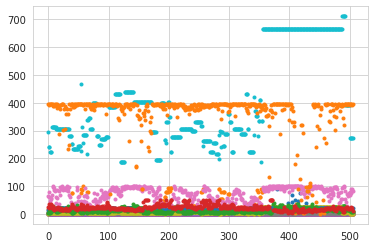

In [54]:
plt.plot(dataset, '.')

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [0]:
#Function to fit, train, and test linear regression model.
def basicLR(data):
    #X Set
    X = data.drop(columns='MEDV')
    
    #Y set
    y = data['MEDV']
    
    #Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    #Create linear model object
    lm = LinearRegression()
    
    #Fit linear object model to training data
    lm.fit(X_train, y_train)
    
    #Make predictions using lm.predict
    predictions = lm.predict(X_test)
    
    #Print model quality of fit scores.
    print('r^2: ', r2_score(y_test, predictions))
    print("MSE: ", mean_squared_error(y_test, predictions))
    
    return r2_score(y_test, predictions), mean_squared_error(y_test, predictions)

In [58]:
bostonr2, bostonMSE = basicLR(dataset)

r^2:  0.7123963332666865
MSE:  28.547585271468208


In [59]:
polyr2, polyMSE = basicLR(poly_features)

r^2:  0.8344973581674365
MSE:  16.427818302989316


In [0]:
basicLR_frame = pd.DataFrame(data=[[bostonr2, polyr2], [bostonMSE, polyMSE]], columns=['Baseline', 'Polynomial'], index=['r^2', 'MSE'])

In [61]:
basicLR_frame

,Baseline,Polynomial
r^2,0.712396,0.834497
MSE,28.547585,16.427818


By engineering polynomial features we can see the r^2 score has increased by 12% and the MSE has decreased by 12. This is a solid improvement in model performance by just introducing interaction terms.

Ridge Regression


Ridge regression is a form of linear regression that introduced regularization in the form of the L2 norm. This regularization aims to shrink the coefficients of the linear regression model therefore reducing the chance of overfitting. There are other types of regularization regression methods such as lasso and elastic net. Lasso is better suited for datasets that contain more features as it aims to reduce insignificant coefficients therefore reducing the dimensionality of the dataset.

In [0]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [0]:
#Function to fit, train, and test linear regression model.
def RidgeLR(data):
    #X Set
    X = data.drop(columns='MEDV')
    
    #Y set
    y = data['MEDV']
    
    #Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    #Alphas to tune
    alphas = {'alpha':[.001, .01, .1, 10, 100]}
    
    #Create Ridge object
    ridge = Ridge(random_state = 101)
    
    #Create ridge model
    clf = GridSearchCV(ridge, alphas)
    
    #Fit linear object model to training data
    clf.fit(X_train, y_train)
    
    #Make predictions using lm.predict
    predictions = clf.predict(X_test)
    
    #Print model quality of fit scores.
    print('r^2: ', r2_score(y_test, predictions))
    print("MSE: ", mean_squared_error(y_test, predictions))
    
    return r2_score(y_test, predictions), mean_squared_error(y_test, predictions)

In [64]:
bridger2, bridgemse = RidgeLR(dataset)

r^2:  0.7123907930988351
MSE:  28.548135189401993


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [65]:
polyridger2, polyridgemse = RidgeLR(poly_features)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.68403e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.2694e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.6699e-17): result may not be accurate.
  overwrite_a=True).T


r^2:  0.8524836781892844
MSE:  14.64249334390338


In [66]:
RidgeLR = pd.DataFrame(data=[[bridger2, polyridger2], [bridgemse, polyridgemse]], columns=['boston', 'poly features'], index=['r^2', 'MSE'])
RidgeLR

,boston,poly features
r^2,0.712391,0.852484
MSE,28.548135,14.642493


We can see here that using ridge regression has increased the r^2 metric to 85% and decreased the MSE to 14.64.

# Conclusion

This notebook encompased an end to end machine learning project. It followed a framework of Inspecting the data, performing some EDA, engineering features, training and testing our data on multiple machine learning models and interpreting the results. We saw an improvement in model performance by trying a regularized regression algorithm as well as introducing interaction variables to the model.

I'm relatively new to applied machine learning and am trying to get hands on experience using these algorithms through completing notebooks like this one. Some areas I didn't get a chance to tough on that I would have liked to in this notebook are:

- Oulier detection and removal
- Cross validation
- Random Forest Regression As I continue to grow my knowledge base and understanding I will come back and update this notebook. I'm always trying to learn and improve myself in this area so please feel free to leave comments and questions about this notebook!